# Producing high-quality images

For publications you often want images that are higher quality than typically offered by VTK or Paraview. You may also want greater control of the tiling of figures and higher quality text. In this example, we use `matplotlib` to provide this functionality alongside Pyvista's off-screen plotting option, which enables much  high resolution images to be created.

### Read the pebble data

In [65]:
import pyvista as pv
# Load the data
fluid_reader = pv.get_reader('pebble_cht/pebble.nek5000')
fluid_reader.set_active_time_point(fluid_reader.number_time_points-1)

fluid = fluid_reader.read()

3D-Mesh found, spectral element of size = 4*4*4=64


### Create screenshots

A key difference between this tutorial and others is that we pass `off_screen=True` to the plotter and use the `screenshot` method without passing a file name. This returns the image as an RGBA array we can plot in matplotlib.

First, we plot the Velocity magnitude:

In [66]:
p = pv.Plotter(off_screen=True, window_size=(500,3000))

p.add_mesh(fluid.clip(normal='x'),
           scalars='Velocity',
           cmap='bwr',
           clim=(0,0.00265),
           show_scalar_bar=False)

p.view_yz()
p.camera.zoom(5.5)
im1 = p.screenshot(transparent_background=True)

Let's repeat this with the temperature

In [67]:
p = pv.Plotter(off_screen=True, window_size=(500,3000))

p.add_mesh(fluid.clip(normal='x'),
           scalars='Temperature',
           cmap='hot',
           clim=(0,600),
           show_scalar_bar=False)

p.view_yz()
p.camera.zoom(5.5)
im2 = p.screenshot(transparent_background=True)

### Creating the matplotlib figure

Here, we use the `subplots` function to tile the above screenshots together. Other keys features are
- use `imshow` to plot the RGBA arrays.
- The axis spines and ticks are not needed so are switched off with `axis('off')`.
- Often in publications, we want subfigures. My preference is to produce these as the figure is created, so here I add $(a)$ and $(b)$ in the upper left of each axis.
- I also prefer the flexibility of matplotlib's colorbars over those in VTK/Paraview, so I will create it here using a `ScalarMappable` object to represent the color mapping.

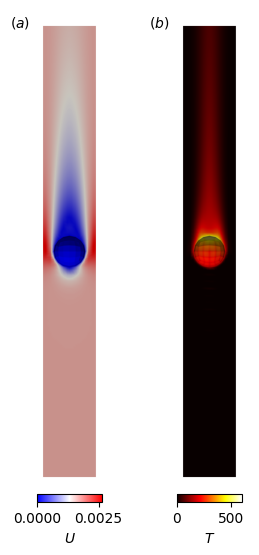

In [68]:
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Create subplots
fig, ax = plt.subplots(1,2, figsize=(3,6))

# plot the screen shots
ax[0].imshow(im1)
ax[1].imshow(im2)

# turn off the axes
for a in ax:
    a.axis('off')

# add subfigure labels
ax[0].text(0.01,0.99, "$(a)$", va='top',ha='right', transform=ax[0].transAxes)
ax[1].text(0.01,0.99, "$(b)$", va='top',ha='right', transform=ax[1].transAxes)

# Create color bar labels
cbar1 = fig.colorbar(ScalarMappable(cmap='bwr', norm=Normalize(0,0.00265)),
             ax=ax[0],
             location='bottom',
             label="$U$",
             shrink=0.5,
             aspect=8,
             pad=0.)

cbar2 = fig.colorbar(ScalarMappable(cmap='hot', norm=Normalize(0,600)),
             ax=ax[1],
             location='bottom',
             label="$T$",
             shrink=0.5,
             aspect=8,
             pad=0.)

# use tight layout
fig.tight_layout()